In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sys
import os

In [2]:
module_path = os.path.abspath(os.path.join('..'))
iris_path = module_path + "\\Datasets\\Iris.csv"
iris_path

'D:\\Programming\\Python\\Jupyter\\Datasets\\Iris.csv'

In [3]:
dataset = pd.read_csv(iris_path)
dataset.sample(5,random_state=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
134,135,6.1,2.6,5.6,1.4,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
42,43,4.4,3.2,1.3,0.2,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica


In [4]:
for col_name in dataset.columns[:4]:
    pd.to_numeric(dataset[col_name])

In [5]:
dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

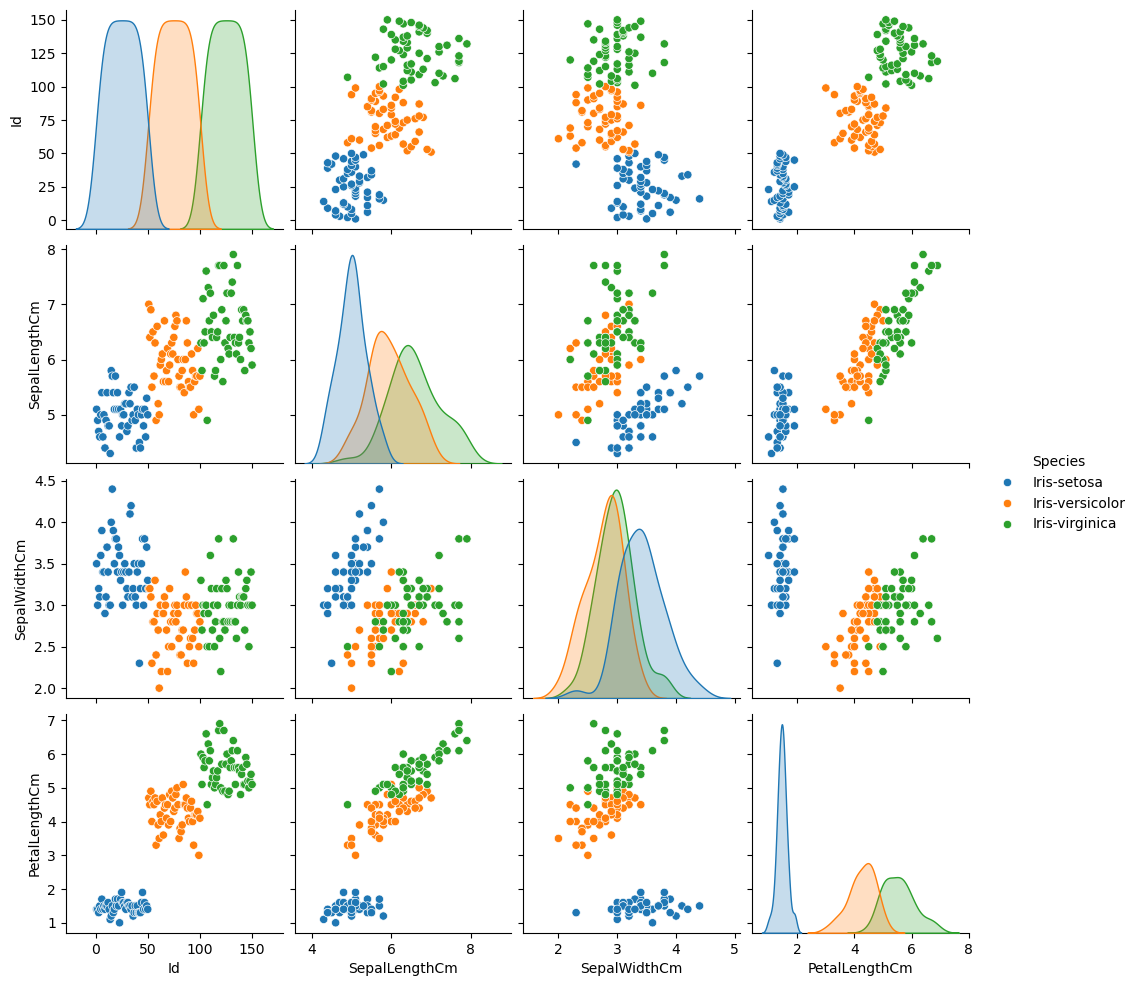

In [6]:
sns.pairplot(data=dataset, hue='Species', vars=dataset.columns[:4], kind='scatter')
plt.show()

In [7]:
binary_dataset = dataset.drop(index=dataset.index[dataset['Species'] == 'Iris-setosa'])

In [8]:
binary_dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
binary_dataset.loc[dataset['Species'] == 'Iris-versicolor', dataset.columns == 'Species'] = -1

In [10]:
binary_dataset.loc[dataset['Species'] == 'Iris-virginica', dataset.columns == 'Species'] = 1

In [11]:
x = binary_dataset.iloc[:,1:5].values
y = binary_dataset.iloc[:,-1].values.reshape(-1)

In [12]:
x = np.array(np.hstack([x,np.ones([len(x),1])]), dtype=np.float64)
y = np.array(y, dtype=np.int64)

In [13]:
x

array([[7. , 3.2, 4.7, 1.4, 1. ],
       [6.4, 3.2, 4.5, 1.5, 1. ],
       [6.9, 3.1, 4.9, 1.5, 1. ],
       [5.5, 2.3, 4. , 1.3, 1. ],
       [6.5, 2.8, 4.6, 1.5, 1. ],
       [5.7, 2.8, 4.5, 1.3, 1. ],
       [6.3, 3.3, 4.7, 1.6, 1. ],
       [4.9, 2.4, 3.3, 1. , 1. ],
       [6.6, 2.9, 4.6, 1.3, 1. ],
       [5.2, 2.7, 3.9, 1.4, 1. ],
       [5. , 2. , 3.5, 1. , 1. ],
       [5.9, 3. , 4.2, 1.5, 1. ],
       [6. , 2.2, 4. , 1. , 1. ],
       [6.1, 2.9, 4.7, 1.4, 1. ],
       [5.6, 2.9, 3.6, 1.3, 1. ],
       [6.7, 3.1, 4.4, 1.4, 1. ],
       [5.6, 3. , 4.5, 1.5, 1. ],
       [5.8, 2.7, 4.1, 1. , 1. ],
       [6.2, 2.2, 4.5, 1.5, 1. ],
       [5.6, 2.5, 3.9, 1.1, 1. ],
       [5.9, 3.2, 4.8, 1.8, 1. ],
       [6.1, 2.8, 4. , 1.3, 1. ],
       [6.3, 2.5, 4.9, 1.5, 1. ],
       [6.1, 2.8, 4.7, 1.2, 1. ],
       [6.4, 2.9, 4.3, 1.3, 1. ],
       [6.6, 3. , 4.4, 1.4, 1. ],
       [6.8, 2.8, 4.8, 1.4, 1. ],
       [6.7, 3. , 5. , 1.7, 1. ],
       [6. , 2.9, 4.5, 1.5, 1. ],
       [5.7, 2

In [14]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [15]:
model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(x,y)

In [16]:
model.coef_

array([[-3.94857799e-01, -5.12236925e-01,  2.93150207e+00,
         2.41616121e+00, -1.17463494e-03]])